In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from math import sqrt
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Kwame Kissi-Twum\\Desktop\\python\\diabetes.csv")
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
print(df.shape)

(768, 9)


In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
features = [column for column in df]
unique_values = [np.unique(df[column]) for column in df]
nr_values = [len(values) for values in unique_values]

for feature, values, n in zip(features, unique_values, nr_values):
    if n <=9 :
        print(f"The number of values for feature {feature} is: {n} -- {values}")
    else:
        print(f"The number of values for feature {feature} is: {n}")


The number of values for feature Pregnancies is: 17
The number of values for feature Glucose is: 136
The number of values for feature BloodPressure is: 47
The number of values for feature SkinThickness is: 51
The number of values for feature Insulin is: 186
The number of values for feature BMI is: 248
The number of values for feature DiabetesPedigreeFunction is: 517
The number of values for feature Age is: 52
The number of values for feature Outcome is: 2 -- [0 1]


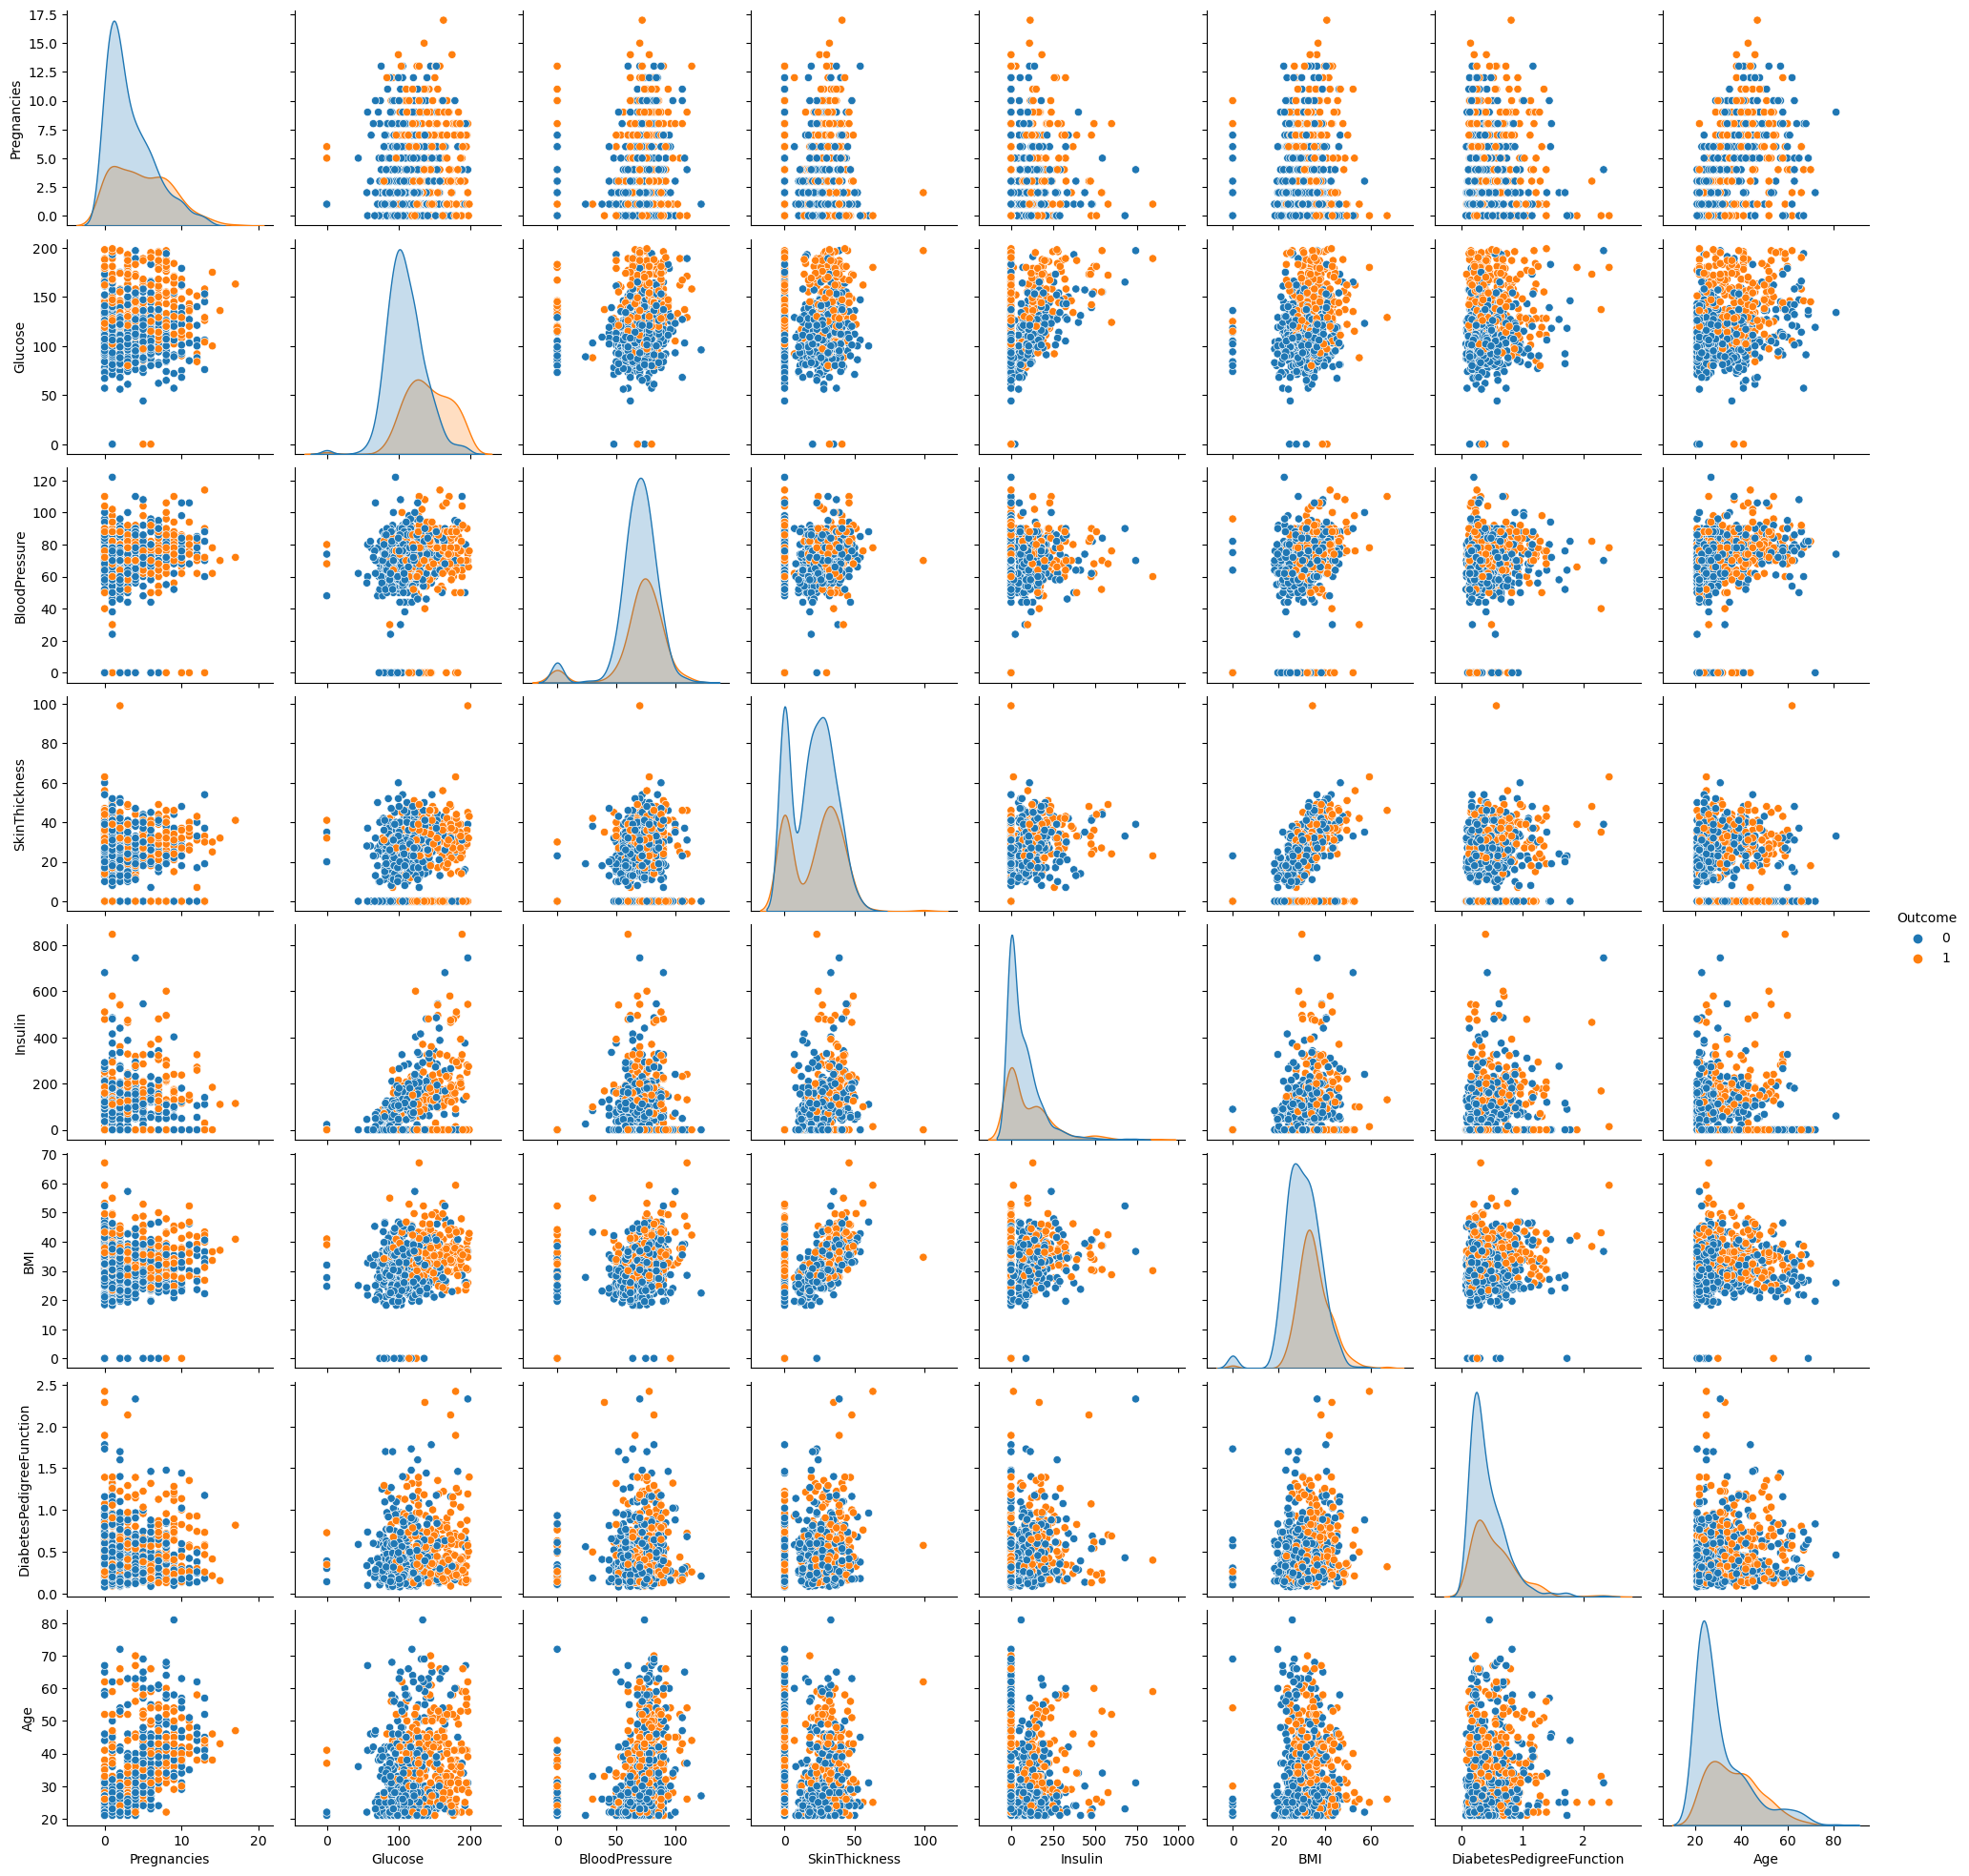

In [7]:
sns.pairplot(df, hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

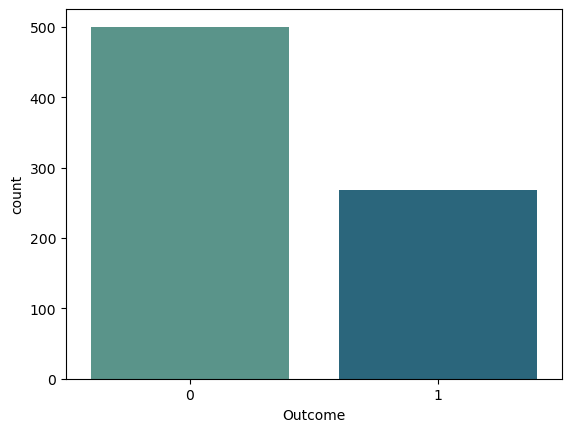

In [8]:
sns.countplot(data=df, x='Outcome', palette = 'crest')

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

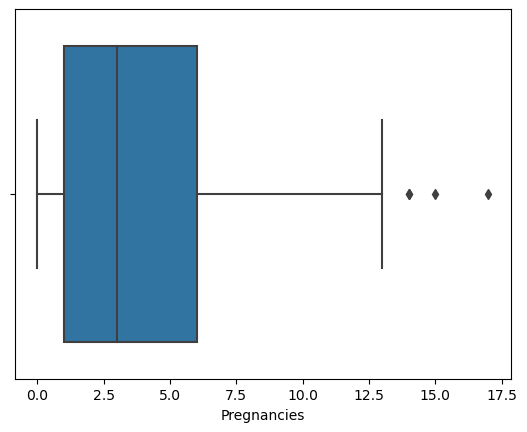

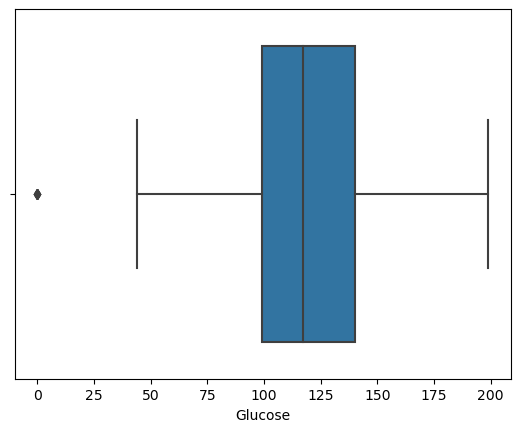

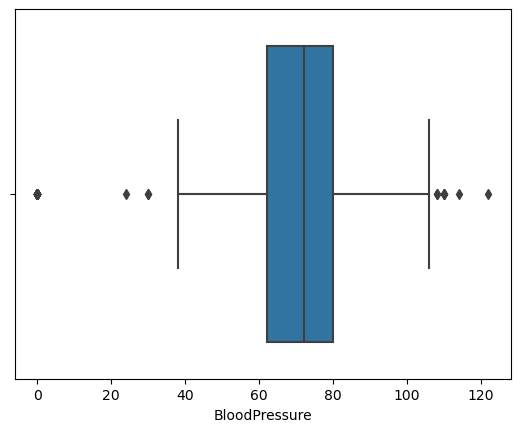

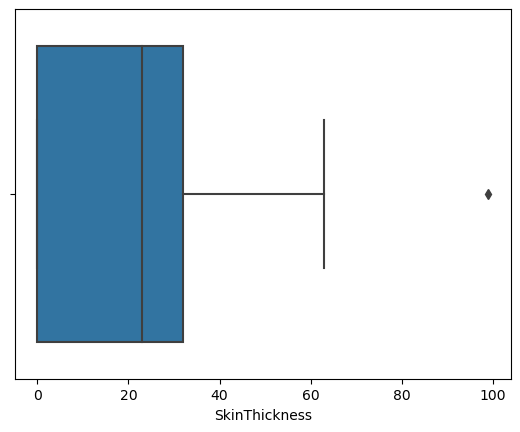

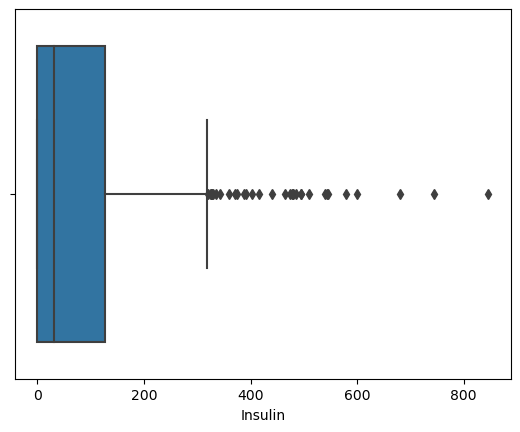

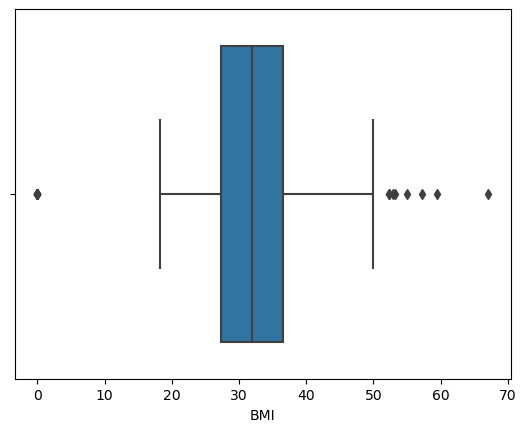

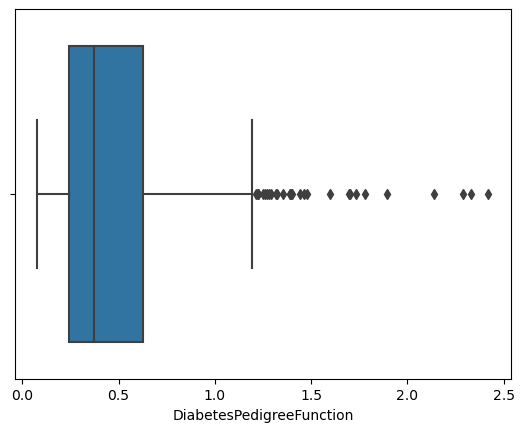

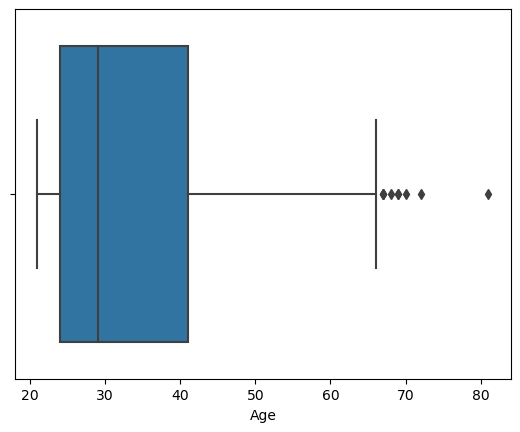

In [10]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    sns.boxplot(data= df, x=feature)
    plt.show() 


In [11]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for column in columns_to_impute:
    column_mean = df[column].mean()
    if df[column].values.all() ==0:
        df[column].replace(0, column_mean, inplace=True)
    
     
df    

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [12]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

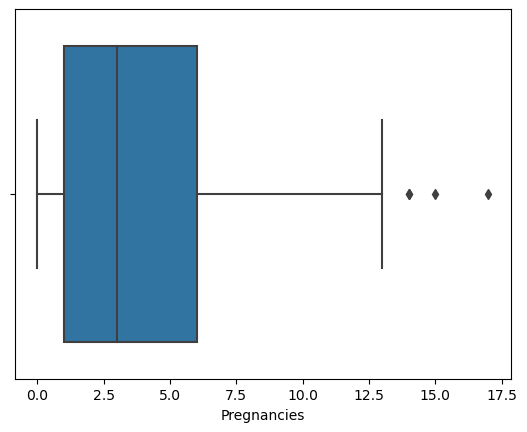

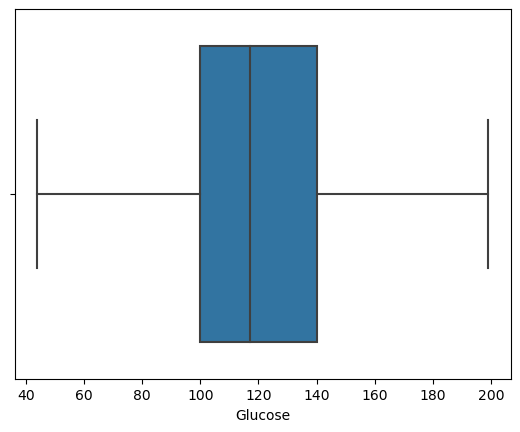

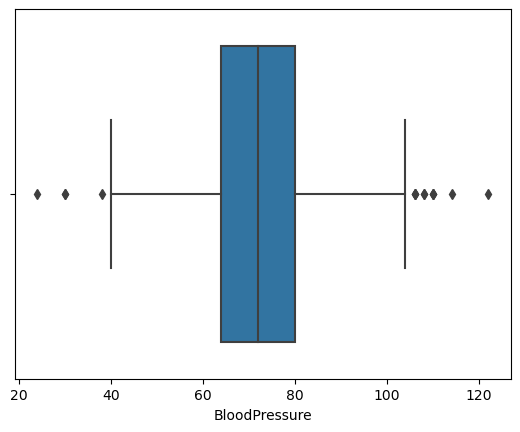

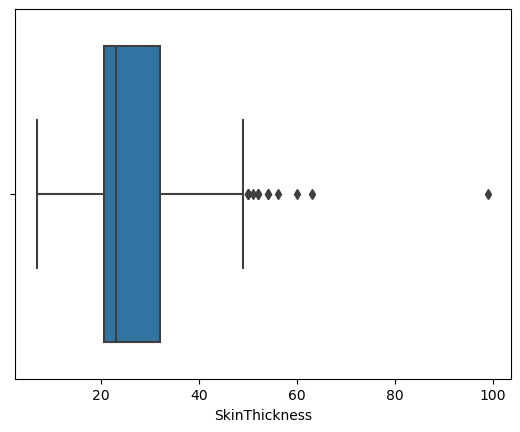

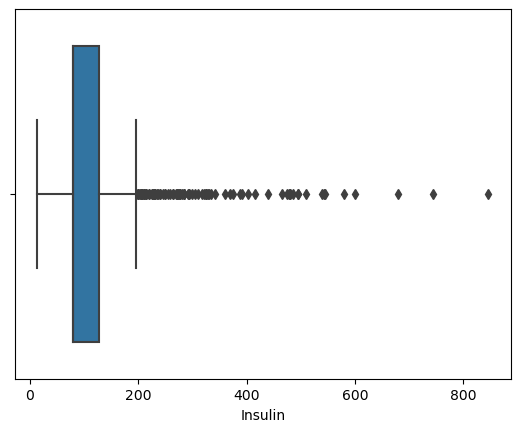

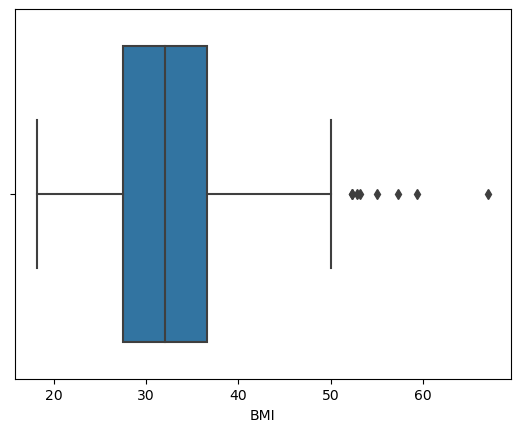

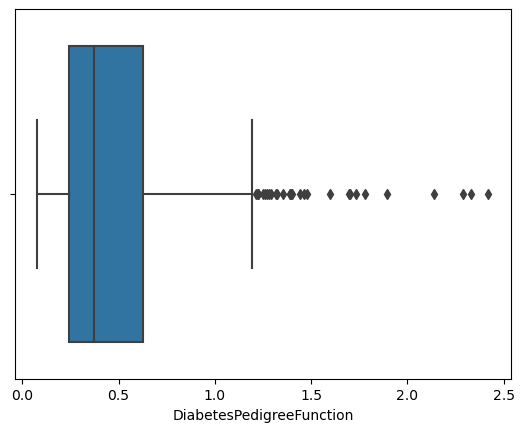

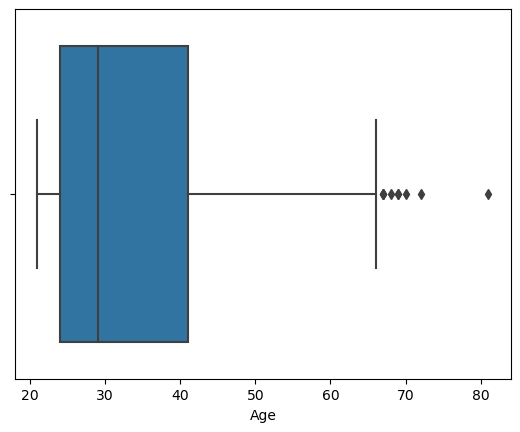

In [13]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    sns.boxplot(data= df, x=feature)
    plt.show() 

In [14]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

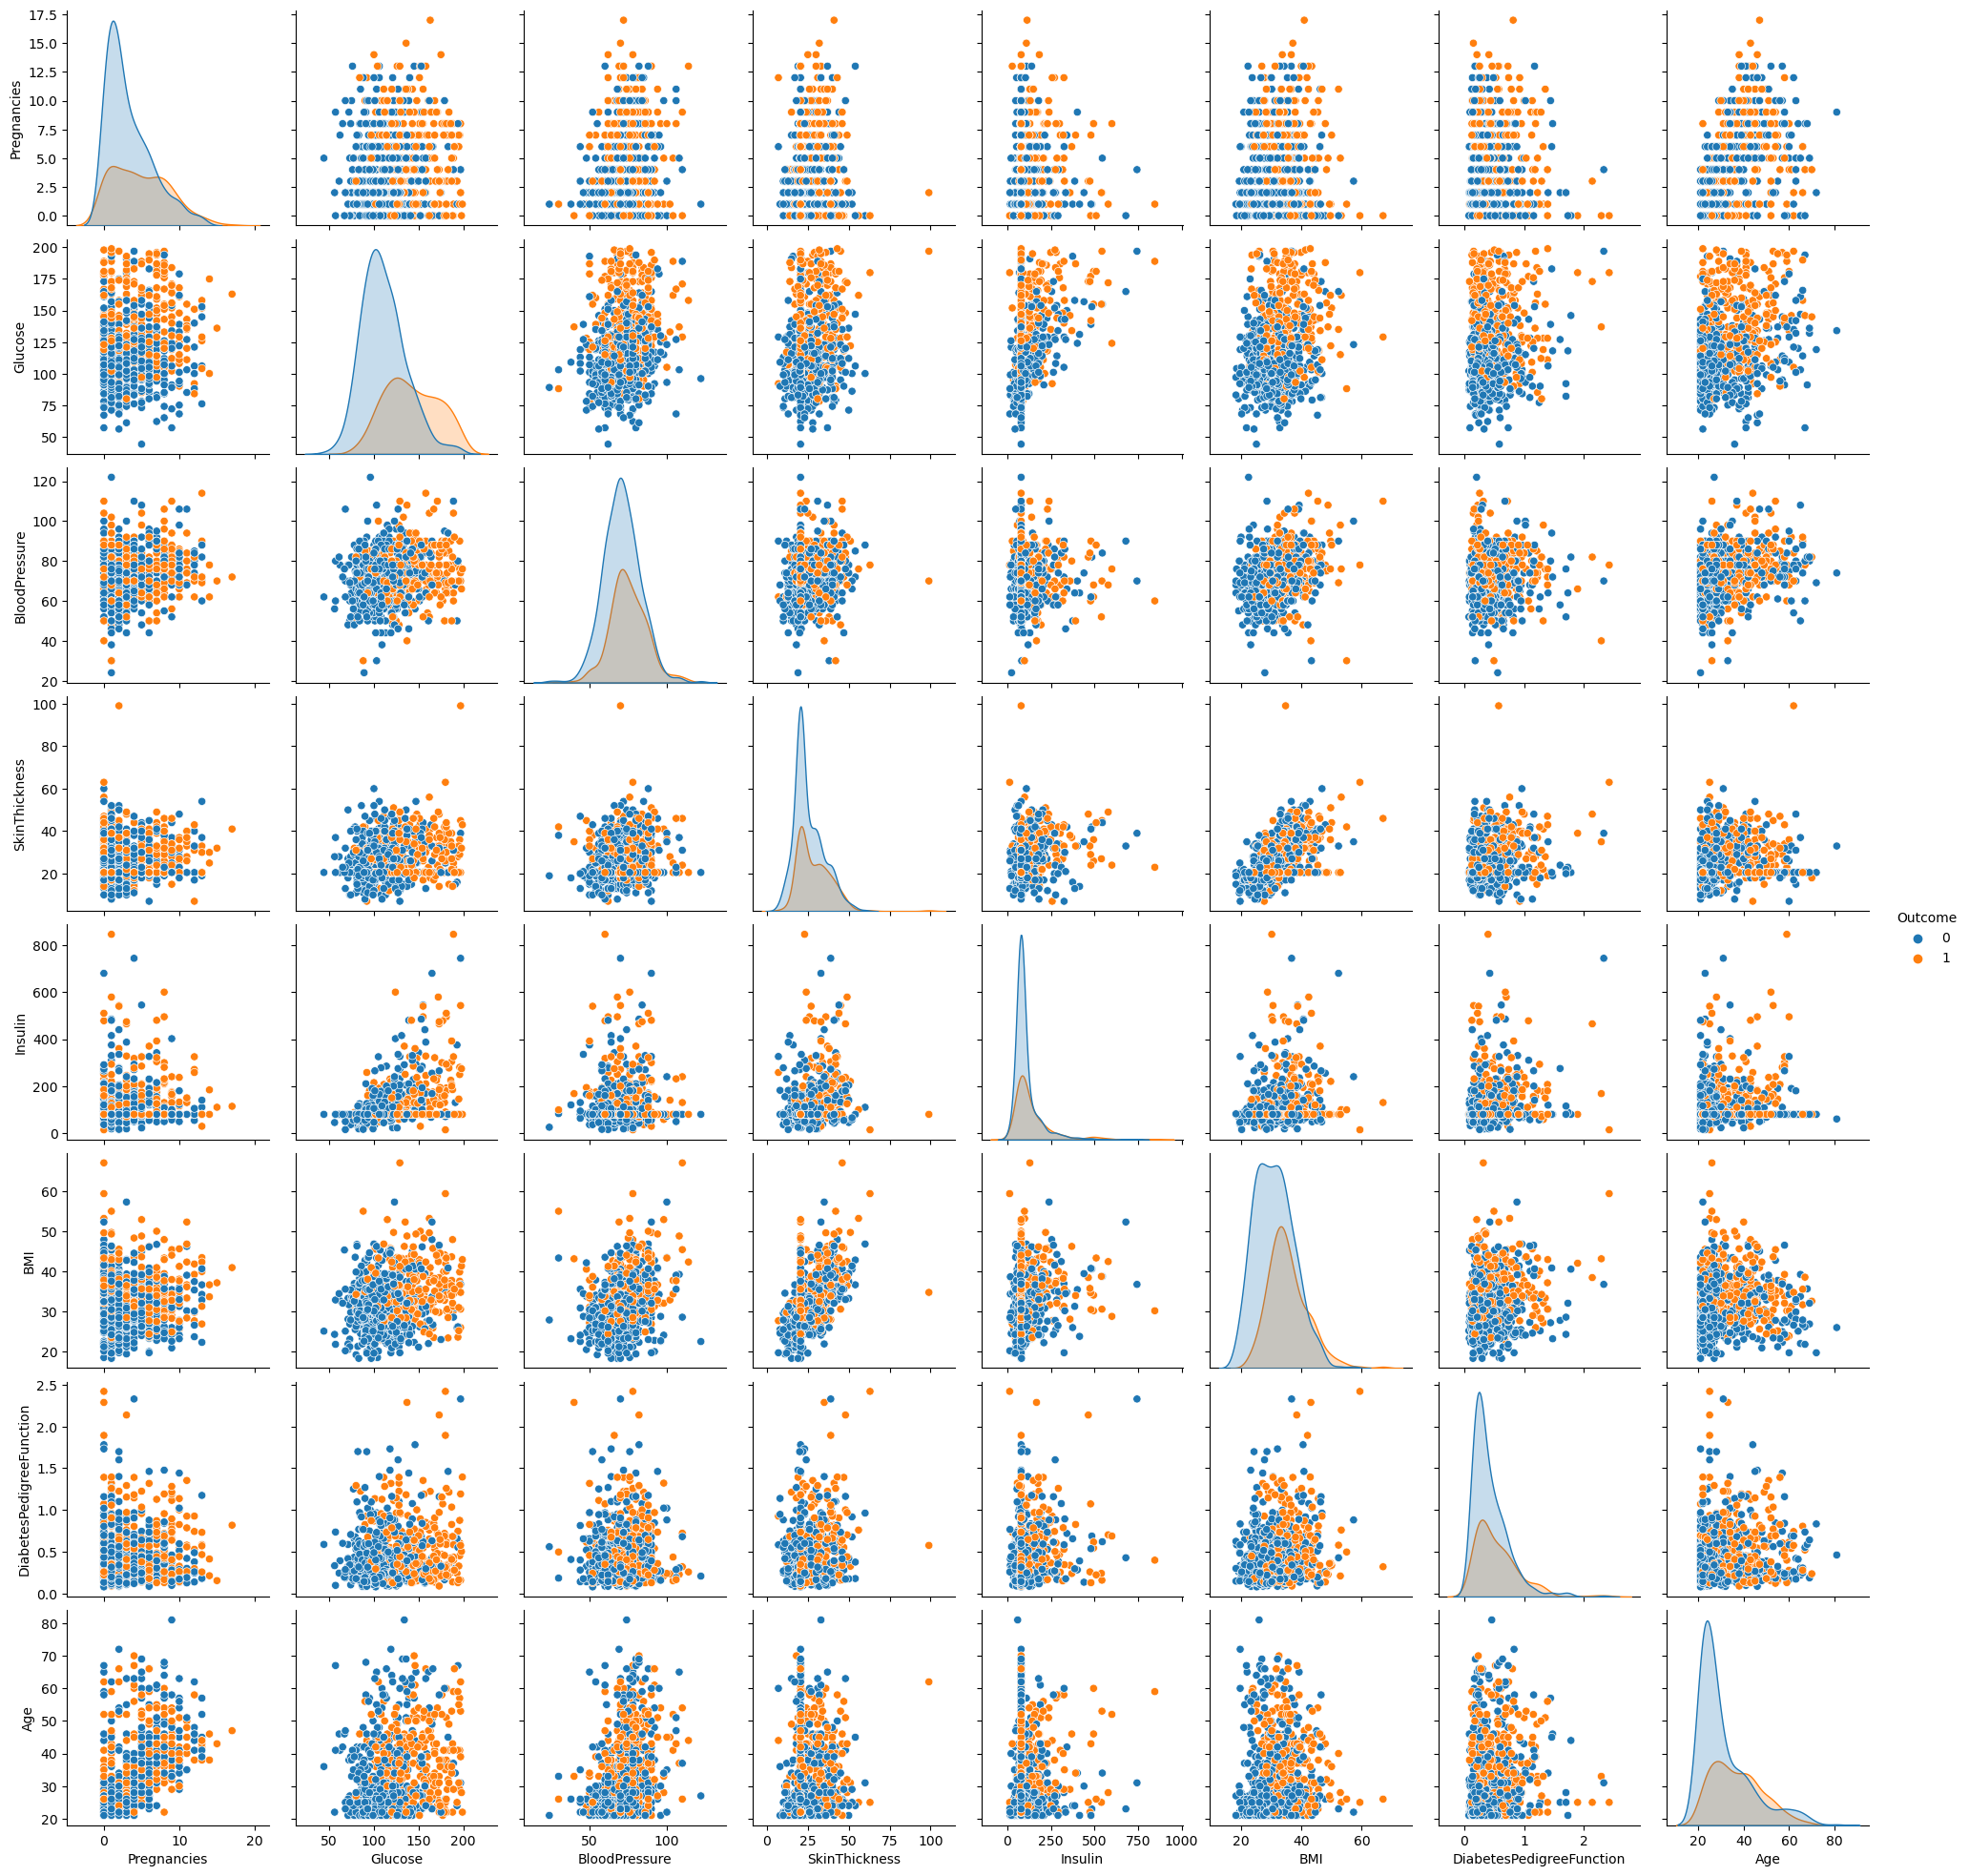

In [15]:
sns.pairplot(data=df, hue='Outcome')

In [16]:
X=df.drop('Outcome',axis=1).values
y = df['Outcome']
X
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [18]:
importances = [f'the feature importance for {column} is:{dt.feature_importances_[i]}' for i, column in enumerate(df.drop('Outcome',axis=1))]
for importance in importances:
    print (importance)

the feature importance for Pregnancies is:0.053931033708978345
the feature importance for Glucose is:0.32428993418185426
the feature importance for BloodPressure is:0.10735640383627812
the feature importance for SkinThickness is:0.022093857313700043
the feature importance for Insulin is:0.06560234685952195
the feature importance for BMI is:0.18528131915319446
the feature importance for DiabetesPedigreeFunction is:0.11553121406946018
the feature importance for Age is:0.12591389087701266


In [19]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=15)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)


In [21]:
log_reg = LogisticRegression(random_state=10, solver = 'newton-cg')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10, solver='newton-cg')

In [22]:
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)
y_pred



array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [23]:
pred_proba = log_reg.predict_proba(X_train)
pred_proba

array([[0.88528244, 0.11471756],
       [0.17834298, 0.82165702],
       [0.17643692, 0.82356308],
       ...,
       [0.07682847, 0.92317153],
       [0.08673283, 0.91326717],
       [0.90434856, 0.09565144]])

In [24]:
print(log_reg.coef_)
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

print(classification_report(y_train, y_pred))

[[ 0.13202249  0.04043475 -0.01109614 -0.00372082 -0.00207042  0.10099975
   1.16594488  0.02183479]]
The Training Accuracy is:  0.7807971014492754
The Testing Accuracy is:  0.7402597402597403
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       350
           1       0.75      0.60      0.67       202

    accuracy                           0.78       552
   macro avg       0.77      0.74      0.75       552
weighted avg       0.78      0.78      0.77       552



In [25]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    
    if classes is not None:
        sns.heatmap(cm, cmap="BuPu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[309,  41],
       [ 80, 122]], dtype=int64)

In [27]:
#cm_pcent = cm/cm.sum(axis=1)
#cm_pcent

In [28]:
cm_pcent = cm/cm.sum(axis=1).reshape(-1,1)
cm_pcent

array([[0.88285714, 0.11714286],
       [0.3960396 , 0.6039604 ]])

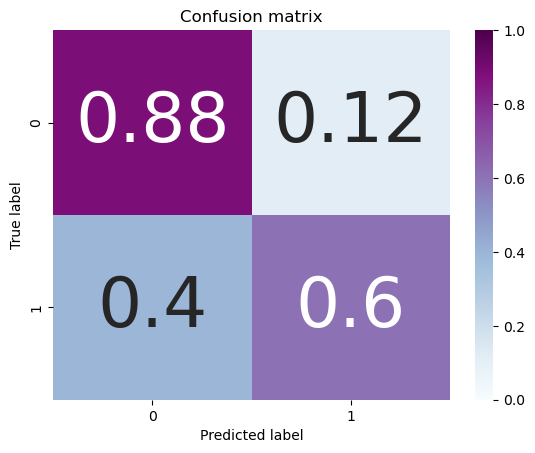

In [29]:
plot_confusion_matrix(cm_pcent, classes=log_reg.classes_, title='Confusion matrix')

In [30]:
cm

array([[309,  41],
       [ 80, 122]], dtype=int64)

In [31]:
FP = cm.sum(axis=0)-np.diag(cm)
FN = cm.sum(axis=1)-np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() -(FP+FN+TP)
TPR = TP/(TP+FN)
PPV = TP/(TP+FP)
FPR = FP / (FP + TN)


print('the average true positive rate is:',TPR.sum()/2)
print('the average PRECISION is:',PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)


the average true positive rate is: 0.7434087694483734
the average PRECISION is: 0.7714053653382118
The average False positive rate is: 0.2565912305516266


In [32]:
print('the logloss on training dataset is:',log_loss(y_train, pred_proba))

pred_proba_t = log_reg.predict_proba(X_test)


print('the logloss on testing dataset is:',log_loss(y_test, pred_proba_t))

the logloss on training dataset is: 0.45059076803136894
the logloss on testing dataset is: 0.5298343979424703


In [33]:
C_List = np.geomspace(1e-5, 1e5, num=20)

In [34]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

log_reg2 = LogisticRegressionCV(random_state=10, solver = 'newton-cg')
log_reg2.fit(X_train, y_train)
print("The CA is:", log_reg2.score(X_test, y_test))
predprob = log_reg2.predict_proba(X_train)
logloss2 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", logloss2)

print("The optimal C parameter is: ", log_reg2.C_)

The CA is: 0.7402597402597403
The Logistic Loss is:  0.5298343979424703
The optimal C parameter is:  [2.7825594]


In [35]:
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg3 = LogisticRegression(random_state=10, solver = 'newton-cg', C=c)
    log_reg3.fit(X_train, y_train)
    score = log_reg3.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t2 = log_reg3.predict_proba(X_test)
    logloss3 = log_loss(y_test, pred_proba_t2)
    Logarithmic_Loss.append(logloss3)
    print("The Logg Loss of C parameter {} is {}:".format(c, logloss3))
    print("")

The CA of C parameter 1e-05 is 0.7727272727272727:
The Logg Loss of C parameter 1e-05 is 0.5218621416106993:

The CA of C parameter 3.359818286283781e-05 is 0.7532467532467533:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.5086256426498008:

The CA of C parameter 0.00011288378916846884 is 0.7467532467532467:
The Logg Loss of C parameter 0.00011288378916846884 is 0.5060585304756144:

The CA of C parameter 0.000379269019073225 is 0.7597402597402597:
The Logg Loss of C parameter 0.000379269019073225 is 0.503247825868918:

The CA of C parameter 0.0012742749857031334 is 0.7532467532467533:
The Logg Loss of C parameter 0.0012742749857031334 is 0.5016348792302134:

The CA of C parameter 0.004281332398719391 is 0.7597402597402597:
The Logg Loss of C parameter 0.004281332398719391 is 0.5025141917964121:

The CA of C parameter 0.01438449888287663 is 0.7402597402597403:
The Logg Loss of C parameter 0.01438449888287663 is 0.5047504790758114:

The CA of C parameter 0.04832930238571752 is 

In [36]:
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)
outcomes = zip(C_List, CA2, Logarithmic_Loss2)
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

index         C_List       CA2  Logarithmic_Loss2
0       4       0.001274  0.753247           0.501635
1       5       0.004281  0.759740           0.502514
2       3       0.000379  0.759740           0.503248
3       6       0.014384  0.740260           0.504750
4       2       0.000113  0.746753           0.506059
5       1       0.000034  0.753247           0.508626
6       7       0.048329  0.740260           0.509146
7       8       0.162378  0.733766           0.517536
8       0       0.000010  0.772727           0.521862
9       9       0.545559  0.740260           0.526670
10     10       1.832981  0.740260           0.531928
11     11       6.158482  0.746753           0.533954
12     12      20.691381  0.746753           0.534611
13     13      69.519280  0.746753           0.534811
14     14     233.572147  0.746753           0.534872
15     15     784.759970  0.746753           0.534890
16     16    2636.650899  0.746753           0.534895
17     17    8858.667904  0.746753           0.534897
18     18   29763.514416  0.746753           0.534897
19     19  100000.000000  0.746753           0.534897

The CA of C parameter 1e-05 is 0.7727272727272727:
The Logg Loss of C parameter 1e-05 is 0.5218621416106993:



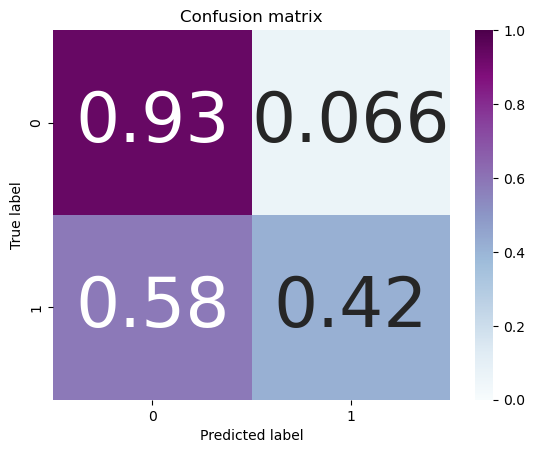

The CA of C parameter 3.359818286283781e-05 is 0.7532467532467533:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.5086256426498008:



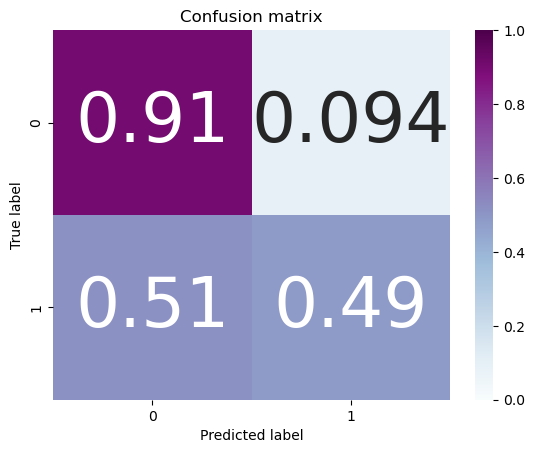

The CA of C parameter 0.00011288378916846884 is 0.7467532467532467:
The Logg Loss of C parameter 0.00011288378916846884 is 0.5060585304756144:



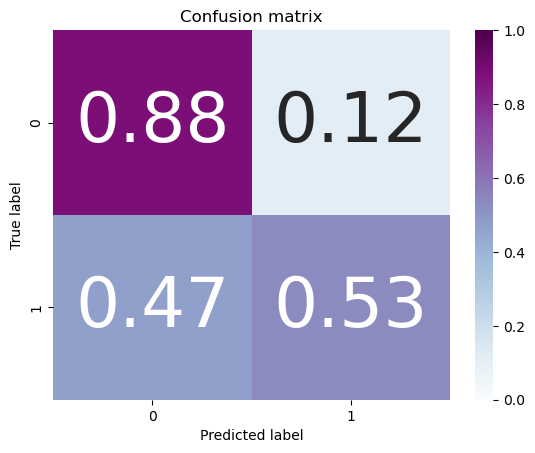

The CA of C parameter 0.000379269019073225 is 0.7597402597402597:
The Logg Loss of C parameter 0.000379269019073225 is 0.503247825868918:



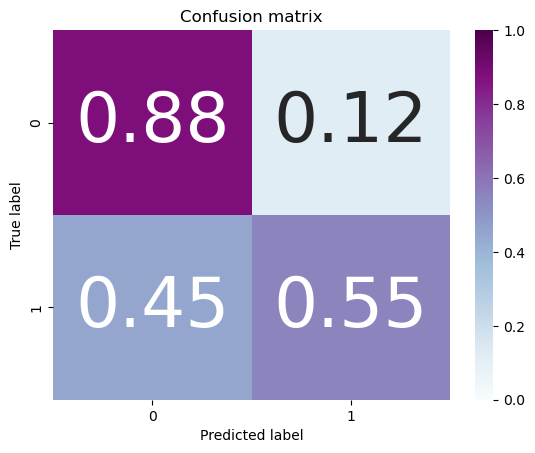

The CA of C parameter 0.0012742749857031334 is 0.7532467532467533:
The Logg Loss of C parameter 0.0012742749857031334 is 0.5016348792302134:



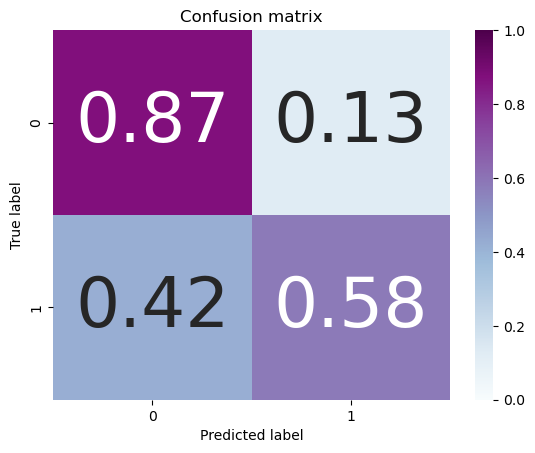

The CA of C parameter 0.004281332398719391 is 0.7597402597402597:
The Logg Loss of C parameter 0.004281332398719391 is 0.5025141917964121:



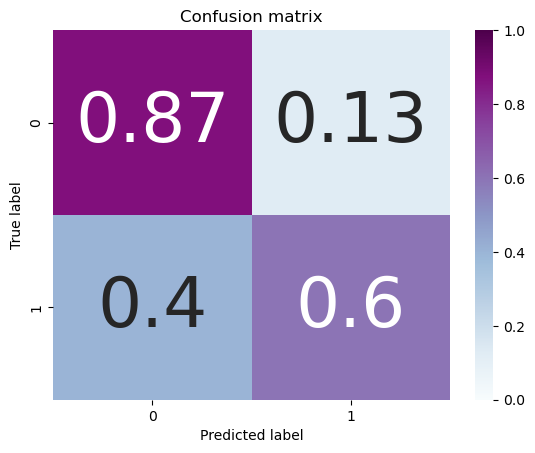

The CA of C parameter 0.01438449888287663 is 0.7402597402597403:
The Logg Loss of C parameter 0.01438449888287663 is 0.5047504790758114:



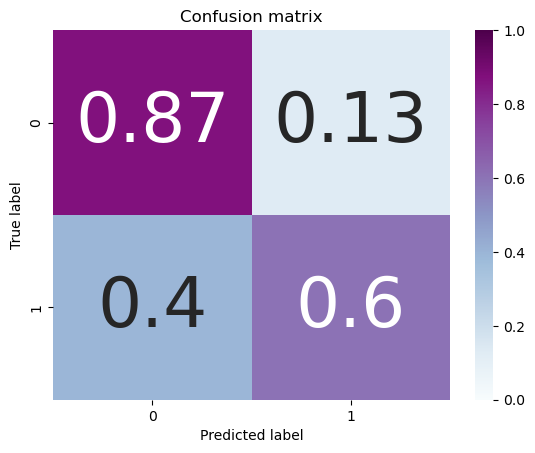

The CA of C parameter 0.04832930238571752 is 0.7402597402597403:
The Logg Loss of C parameter 0.04832930238571752 is 0.5091455767804273:



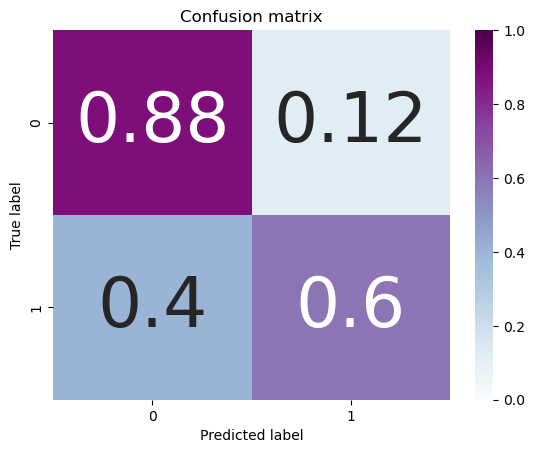

The CA of C parameter 0.1623776739188721 is 0.7337662337662337:
The Logg Loss of C parameter 0.1623776739188721 is 0.5175355285880772:



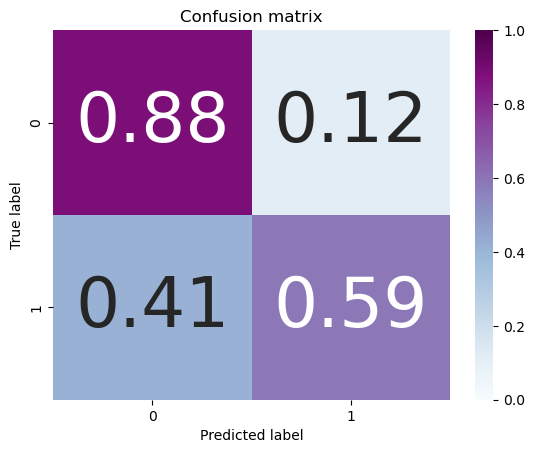

The CA of C parameter 0.5455594781168515 is 0.7402597402597403:
The Logg Loss of C parameter 0.5455594781168515 is 0.5266699309898198:



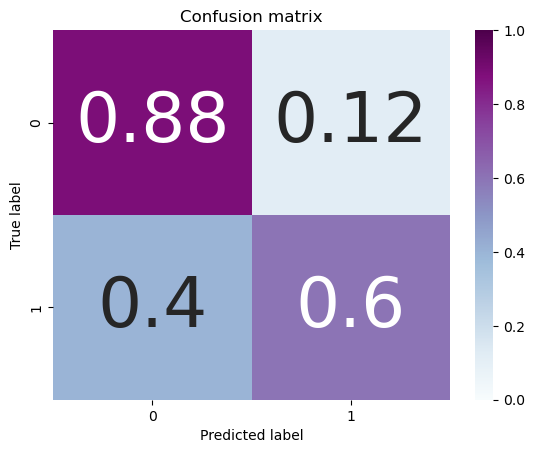

The CA of C parameter 1.8329807108324339 is 0.7402597402597403:
The Logg Loss of C parameter 1.8329807108324339 is 0.5319278515874292:



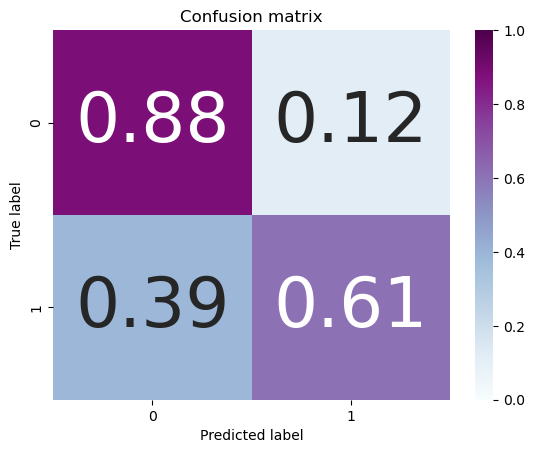

The CA of C parameter 6.1584821106602545 is 0.7467532467532467:
The Logg Loss of C parameter 6.1584821106602545 is 0.5339537255929395:



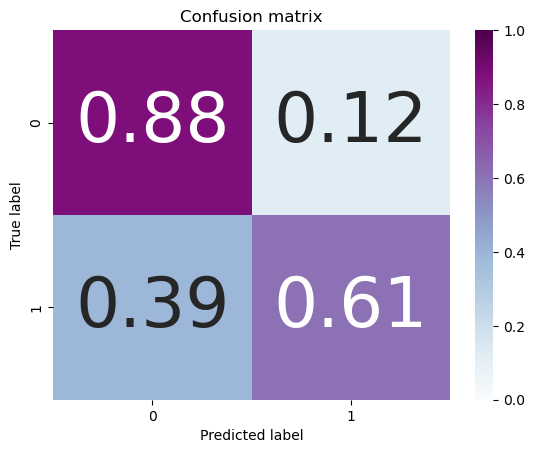

The CA of C parameter 20.6913808111479 is 0.7467532467532467:
The Logg Loss of C parameter 20.6913808111479 is 0.5346106850199198:



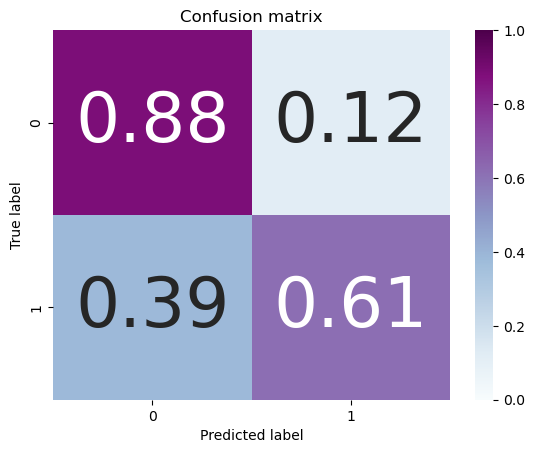

The CA of C parameter 69.51927961775606 is 0.7467532467532467:
The Logg Loss of C parameter 69.51927961775606 is 0.5348112436671097:



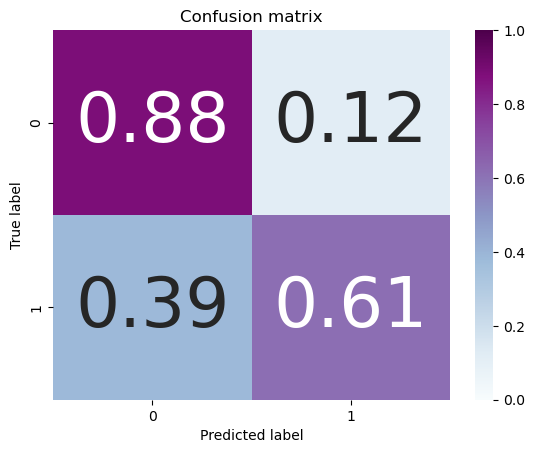

The CA of C parameter 233.57214690901213 is 0.7467532467532467:
The Logg Loss of C parameter 233.57214690901213 is 0.5348716608775324:



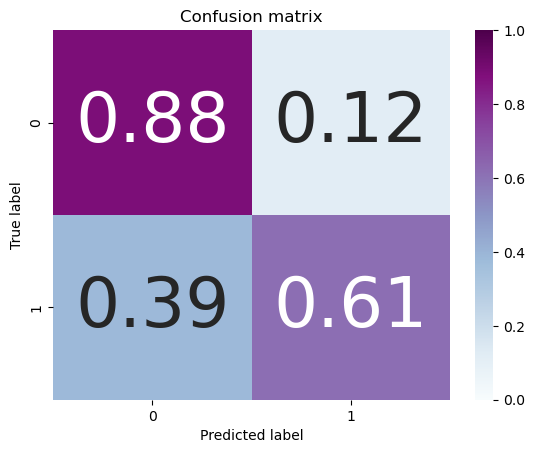

The CA of C parameter 784.7599703514607 is 0.7467532467532467:
The Logg Loss of C parameter 784.7599703514607 is 0.5348896292513898:



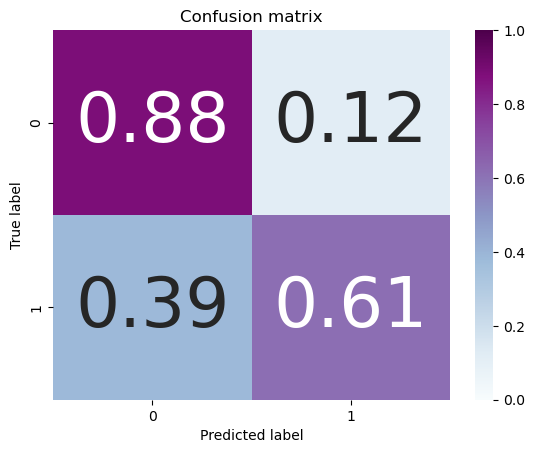

The CA of C parameter 2636.6508987303555 is 0.7467532467532467:
The Logg Loss of C parameter 2636.6508987303555 is 0.5348949810381414:



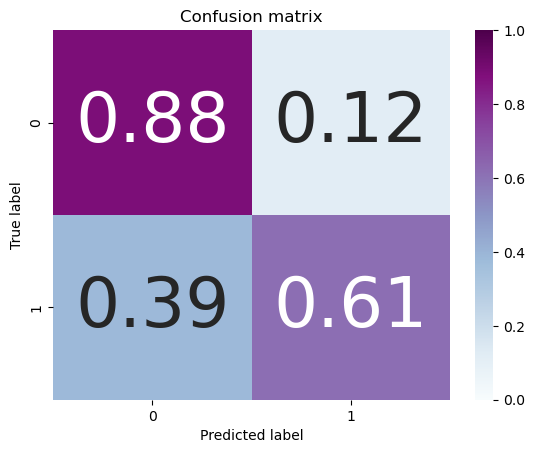

The CA of C parameter 8858.667904100832 is 0.7467532467532467:
The Logg Loss of C parameter 8858.667904100832 is 0.5348965745979103:



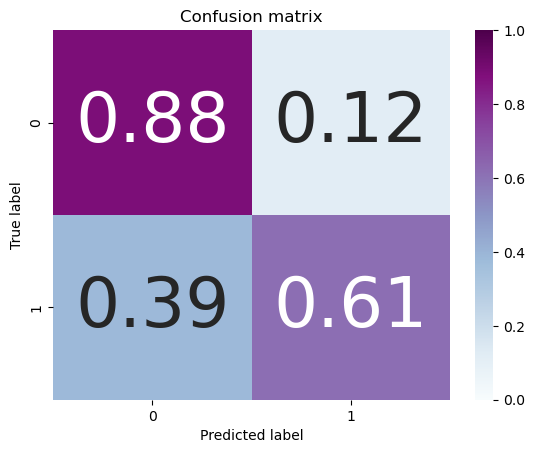

The CA of C parameter 29763.51441631313 is 0.7467532467532467:
The Logg Loss of C parameter 29763.51441631313 is 0.5348970485542971:



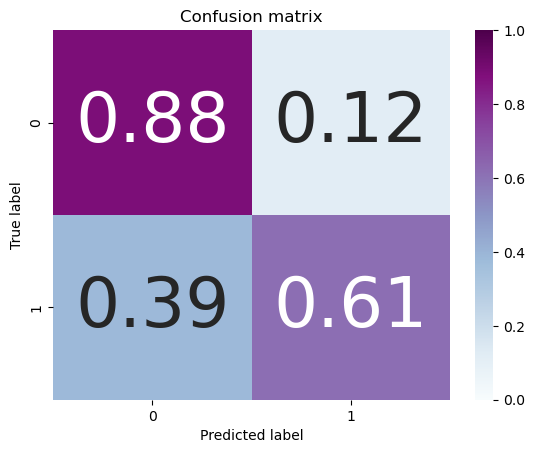

The CA of C parameter 100000.0 is 0.7467532467532467:
The Logg Loss of C parameter 100000.0 is 0.5348971882860185:



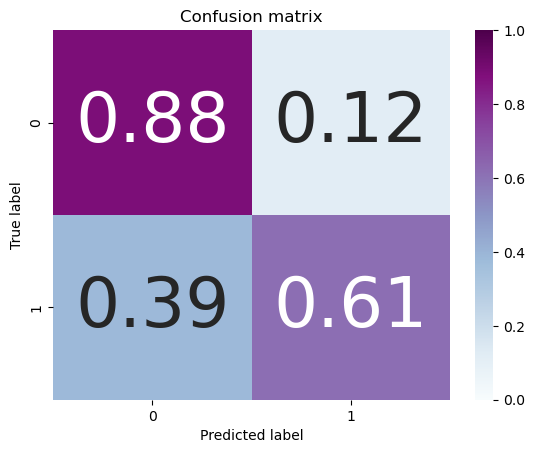

In [37]:
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg3 = LogisticRegression(random_state=10, solver = 'newton-cg', C=c)
    log_reg3.fit(X_train, y_train)
    score = log_reg3.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t2 = log_reg3.predict_proba(X_test)
    logloss3 = log_loss(y_test, pred_proba_t2)
    Logarithmic_Loss.append(logloss3)
    print("The Logg Loss of C parameter {} is {}:".format(c, logloss3))
    print("")
    
    y_pred = log_reg3.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()
  

In [38]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_probat = dummy_clf.predict_proba(X_test)


print("Testing Acc:", score)


Testing Acc: 0.7012987012987013


In [40]:
log_reg6 = LogisticRegression(random_state=10, solver = 'newton-cg', C=2.7825594)
log_reg6.fit(X_train, y_train)
score = log_reg6.score(X_valid, y_valid)

pred_proba_t1 = log_reg6.predict_proba(X_valid)


print("Testing Acc:", score)


Testing Acc: 0.8064516129032258
